SymPy is a python library for __symbolic mathematics__.

In [1]:
import sympy as sp

### Numeric VS Symbolic Computation
---

**Numeric** computations are always concerned with finite *decimal numbers*. Hence they can not represent $\pi$, $\frac{1}{3}$, and $\sqrt{2}$ exactly.

For example the numeric approximation of $\sqrt{2}$ with 8 decimals is
$$\sqrt{2}\approx{1.41421356}.$$

---

**Symbolic** computations are concerned with representing numbers as *symbols satisfying mathematical rules*. Hence they represent $\pi$, $\frac{1}{3}$, and $\sqrt{2}$ exactly.

For example, the symbolic representation of $\sqrt{2}$ is defined by the relation that
$$\sqrt{2}^2=2.$$

---

Neither is better than the other. They are both useful in different situations.

For example, numerical computing is great for graphing or visualization, while symbolic computing is great for understanding the essential features of, say, an equation.

In [2]:
#@title $\sqrt{2}$

print("Numeric:\n", 2 ** .5, "\n", sep="")

print("Symbolic:")
sp.sqrt(2)

Numeric:
1.4142135623730951

Symbolic:


sqrt(2)

In [3]:
#@title $\sqrt{2}^2$

print("Numeric:\n", (2 ** .5) ** 2, "\n", sep="")

print("Symbolic:")
sp.sqrt(2) ** 2

Numeric:
2.0000000000000004

Symbolic:


2

## Defining Symbols

In mathematics, we often work with unknowns or variables. In SymPy we can define these kinds of objects by using the symbol class.

In [4]:
#@title Make a symbol $x$
x = sp.Symbol("x")
x

x

**Note:** The variable name and symbol name do not need to coincide.

In [5]:
#@title An simple expression
1 - 2 * x**2

1 - 2*x**2

### Symplification

Sometimes SymPy expressions are automatically simplified

In [6]:
1 - 2*x**2 + 2

3 - 2*x**2

In [7]:
sp.sin(x) ** 2 + sp.cos(x) ** 2

sin(x)**2 + cos(x)**2

In [8]:
10*x/6

5*x/3

### Expand Expression

In [9]:
expr = x * (x - 1)
expr

x*(x - 1)

In [10]:
expr.expand()

x**2 - x

**Note:** The expression itself does not change

In [11]:
#@title Can define multiple symbols at once
y, z = sp.symbols("y z")
y

y

In [12]:
poly = y*(y+1)*(z*2-3)
poly

y*(y + 1)*(2*z - 3)

In [13]:
poly.expand()

2*y**2*z - 3*y**2 + 2*y*z - 3*y

### Factor Expression

In [14]:
expr = x**2 + 2*x-15
expr

x**2 + 2*x - 15

In [15]:
expr.factor()

(x - 3)*(x + 5)

**Note:** The factor method will not always manage to factor your expression. We know that for fifth degrees polynomials and above there does not exist an explicit algorithm to find all the roots. So even though you end up with SymPy saying that there exists no answer or not giving you a factored expression this does not mean that it does not exist any.

In [16]:
#@title Can make many symbols as follows
x_v = sp.symbols("x0:3")
x_v

(x0, x1, x2)

In [17]:
expr = x_v[0] ** 2 * x_v[1] * x_v[2] + x_v[2] * x_v[1]
expr

x0**2*x1*x2 + x1*x2

In [18]:
expr.factor()

x1*x2*(x0**2 + 1)

## Data Types and Common Functions

In [19]:
x = sp.S("x")
x ** (1/3)

x**0.333333333333333

### SymPy's Integer Type

In [20]:
x ** (sp.Integer(1)/3)

x**(1/3)

In [21]:
x ** (sp.S(1)/3)

x**(1/3)

### SymPy's Rational Type

In [22]:
sp.Rational(1, 3)

1/3

### Important Constants

In [23]:
#@title The constant pi
sp.pi

pi

In [24]:
#@title The constant e
sp.E

E

In [25]:
#@title Infinity
sp.oo

oo

In [26]:
#@title The imaginary unit
sp.I

I

### Common Functions

In [27]:
#@title Exponential function
sp.exp(x)

exp(x)

In [28]:
#@title Eulers identity $\quad\exp(\pi{i})=-1$
sp.exp(sp.pi * sp.I)

-1

In [29]:
#@title Logarithm function
sp.log(x)

log(x)

In [30]:
#@title Trigonometric functions
sp.sin(x) + sp.tan(x)

sin(x) + tan(x)

## Solving Equations

In [31]:
#@title Defining symbols $x$, $y$, and $z$
x, y, z = sp.symbols("x y z")
x, y, z

(x, y, z)

In [32]:
#@title Defining Equations
eq = sp.Eq(x**4, 16)
eq

Eq(x**4, 16)

In [33]:
#@title Solve Equation
sp.solveset(eq)

{-2, 2, -2*I, 2*I}

---

In [34]:
eq = sp.Eq(x**3+y**2, 7 + 2 * z)
eq

Eq(x**3 + y**2, 2*z + 7)

In [35]:
#@title Solve Equation for $y$
sp.solveset(eq, y)

{-sqrt(-x**3 + 2*z + 7), sqrt(-x**3 + 2*z + 7)}

---

In [36]:
eq = sp.Eq(sp.cos(x)+sp.sin(x), 0)
eq

Eq(sin(x) + cos(x), 0)

In [37]:
sp.solveset(eq)

Union(ImageSet(Lambda(_n, 2*_n*pi + 3*pi/4), Integers), ImageSet(Lambda(_n, 2*_n*pi + 7*pi/4), Integers))

---

In [38]:
#@title Defining a non-solvable equation
eq = sp.Eq(sp.cos(x), x)
eq

Eq(cos(x), x)

In [39]:
sp.solveset(eq)

ConditionSet(x, Eq(-x + cos(x), 0), Complexes)

### Solving Systems of Linear Equations

In [40]:
eq1 = sp.Eq(x, 3*y + z)
eq1

Eq(x, 3*y + z)

In [41]:
eq2 = sp.Eq(y+z, 5*z - z)
eq2

Eq(y + z, 4*z)

In [42]:
sp.linsolve([eq1, eq2], x, y, z)

{(10*z, 3*z, z)}

## Simplifying

### Expanding Other Expressions

In [43]:
sp.exp(x + y).expand()

exp(x)*exp(y)

In [44]:
expr = (sp.cos(x) + sp.sin(y)) ** 2 - sp.cos(x) ** 2
expr

(sin(y) + cos(x))**2 - cos(x)**2

In [45]:
expr.expand()

sin(y)**2 + 2*sin(y)*cos(x)

In [46]:
expr = sp.cos(x+y)
expr

cos(x + y)

In [47]:
expr.expand(trig=True)

-sin(x)*sin(y) + cos(x)*cos(y)

### Cancel and Apart

The **cancel** method will take any rational function on the form $$\frac{p(x)}{q(x)}$$ and factor it so that the polynomials $p(x)$ and $q(x)$ have no common factors.

In [48]:
p = x ** 3 + 10 * x **2 + 31 * x +30
q = x**2+12*x+35
fraq = p/q
fraq

(x**3 + 10*x**2 + 31*x + 30)/(x**2 + 12*x + 35)

In [49]:
fraq.cancel()

(x**2 + 5*x + 6)/(x + 7)

The **apart** method will perform the partial fraction decomposition on a rational function. This is useful when integrating a function.

In [50]:
fraq.apart()

x - 2 + 20/(x + 7)

### The General Simplify

It is the most versatile, but also the slowest and most unspecific.

In [51]:
expr = - 2 * x **2 - x**3 + x * sp.exp(3)
expr

-x**3 - 2*x**2 + x*exp(3)

In [52]:
expr.simplify()

x*(-x**2 - 2*x + exp(3))

## Evaluating Expressions

### Real, Positive, or Integer Symbols

In [53]:
z = sp.Symbol("z")
sp.log(sp.exp(z))

log(exp(z))

In [54]:
#@title Make real symbols
x0, x1, x2 = sp.symbols("x0:3", real=True)
sp.log(sp.exp(x0))

x0

In [55]:
sp.sqrt(x1 ** 2)

Abs(x1)

In [56]:
#@title Make a positive symbol
y = sp.symbols("y", positive=True)
sp.sqrt(y ** 2)

y

In [57]:
#@title Make an integer symbol
n = sp.symbols("n", integer=True)
(-1)**(2*n)

1

### Point Evaluation of Expressions

In [58]:
expr = x0 ** 2 + 5
expr

x0**2 + 5

In [59]:
expr.subs(x0, 2)

9

In [60]:
expr.subs(x0, x1**z)

x1**(2*z) + 5

### Going Numeric

In [61]:
sp.N(expr.subs(x0, sp.pi))

14.8696044010894

In [62]:
#@title Can change the number of desimals
sp.N(expr.subs(x0, sp.pi), 4)

14.87

In [63]:
sp.N(expr.subs(5, sp.pi), 8)

x0**2 + 3.1415927

## Derivatives

In [64]:
expr =  sp.exp(2*x) + sp.sin(x)
expr

exp(2*x) + sin(x)

In [65]:
#@title Differentiating the expression
expr.diff()

2*exp(2*x) + cos(x)

In [66]:
#@title We can differentiate multiple times
expr.diff(x, 2)

4*exp(2*x) - sin(x)

### Rewriting Functions

In [67]:
expr = sp.exp(sp.sinh(x)) / sp.exp(sp.exp(x) / 2)
expr

exp(-exp(x)/2)*exp(sinh(x))

In [68]:
#@title Rewrites the expression in terms of exponential functions
expr.rewrite(sp.exp).simplify()

exp(-exp(-x)/2)

**Note:** We could not have simplified it right away!

#### Rewriting and Partial Derivatives

In [69]:
f = sp.cos(x) * sp.cot(2 * y) ** 2
f

cos(x)*cot(2*y)**2

In [70]:
#@title Differenting the function with respect to y
dfdy = f.diff(y)
dfdy

(-4*cot(2*y)**2 - 4)*cos(x)*cot(2*y)

In [71]:
dfdy.simplify().rewrite(sp.sin)

-2*sin(4*y)*sin(x + pi/2)/sin(2*y)**4

In [72]:
#@title Taking the third derivative with respect to x and second with respect to y
f.diff(x, 3, y, 2)

8*(cot(2*y)**2 + 1)*(3*cot(2*y)**2 + 1)*sin(x)

## Integrals

### Indefinite Integrals

In [73]:
f = sp.cos(2*x)*sp.sin(3*x)
f

sin(3*x)*cos(2*x)

In [74]:
#@title Integrate the function
f.integrate()

-2*sin(2*x)*sin(3*x)/5 - 3*cos(2*x)*cos(3*x)/5

In [75]:
g = x ** y
g

x**y

In [76]:
h = g.integrate(x)
h

x**(y + 1)/(y + 1)

### Definite Integrals

In [77]:
#@title Spesifying upper and lower limits of the integral
sp.integrate(f, (x, 0, sp.pi))

6/5

In [78]:
u = sp.exp(-x)
u

exp(-x)

In [79]:
u.integrate((x, 0, sp.oo))

1

### Multivariable Integrals

In [80]:
w = x * y * z ** 2
w

x*y*z**2

In [81]:
w.integrate(x, y)

x**2*y**2*z**2/4

In [82]:
w.integrate((x, 0, 1), (y, 1, 4), (z, 2, 3))

95/4

## Limits

In [83]:
expr = x ** 2
expr

x**2

In [84]:
sp.limit(expr, x, 1)

1

In [85]:
expr = x / sp.exp(x)
expr

x*exp(-x)

In [86]:
sp.limit(expr, x, sp.oo)

0

**Note:** Limits are taken from the right

In [87]:
expr = 1 / x
expr

1/x

In [88]:
#@title Limit is by default the right limits in SymPy
sp.limit(expr, x, 0)

oo

In [89]:
#@title Getting the left limit
sp.limit(expr, x, 0, "-")

-oo

In [90]:
#@title Getting both right and left limit
sp.limit(expr, x, 0, "+-")

zoo

## Series

In [91]:
sp.sin(x)

sin(x)

In [92]:
#@title Finding the Taylor series of $sin(x)$ at $x = \frac{\pi}{2}$
sp.sin(x).series(x, sp.pi/2)

1 - (x - pi/2)**2/2 + (x - pi/2)**4/24 + O((x - pi/2)**6, (x, pi/2))

In [93]:
#@title Get more terms
sp.sin(x).series(x, n=10)

x - x**3/6 + x**5/120 - x**7/5040 + x**9/362880 + O(x**10)

In [94]:
#@title We can do arithmetic with Taylor expressions
sp.expand(sp.sin(x).series(x, n=10) * sp.series(sp.exp(sp.cos(x)), x, 0))

E*x - 2*E*x**3/3 + 31*E*x**5/120 + O(x**7)

In [95]:
#@title We can differentiate or integrate Taylor series
sp.series(sp.exp(sp.cos(x)), x, 0, n=10).diff()

-E*x + 2*E*x**3/3 - 31*E*x**5/120 + 379*E*x**7/5040 + O(x**9)

In [96]:
#@title We can remove the "Big O" from the expression
sp.series(sp.exp(sp.cos(x)), x, 0, n=5).removeO()

E*x**4/6 - E*x**2/2 + E

## Ordinary Differential Equations

In [97]:
#@title Creating a function object
f = sp.Function("f")(x)
f

f(x)

In [98]:
#@title Taking the derivative of the function
f.diff()

Derivative(f(x), x)

In [99]:
#@title Creating a differential equation
diff_eq = sp.Eq(x*f.diff(x,2) +f.diff(x), x**3)
diff_eq

Eq(x*Derivative(f(x), (x, 2)) + Derivative(f(x), x), x**3)

In [100]:
#@title Getting the RHS
diff_eq.rhs

x**3

In [101]:
#@title Solving the ODE
sol = sp.dsolve(diff_eq, f)
sol

Eq(f(x), C1 + C2*log(x) + x**4/16)

In [102]:
#@title Getting the solution
expr = sol.rhs
expr

C1 + C2*log(x) + x**4/16

In [103]:
C2, C1, _ = tuple(expr.free_symbols)
C1, C2

(C2, x)

In [104]:
#@title Setting the values $C1 = 0$ and $C2 = 1$
expr.subs({C1: 0, C2: 1})

C1 + 1/16

### Giving Initial Conditions

We now solve the initial value problem $$xf''(x)+f'(x)=x^3$$ with the initial conditions $f(1)=0$ and $f'(2)=1$.

In [105]:
#@title Writing a dictionary with the initial conditions
ics = {f.subs(x, 1): 0, f.diff().subs(x, 2): 1}
ics

{f(1): 0, Subs(Derivative(f(x), x), x, 2): 1}

In [106]:
#@title Solving the initial value problem
ivp = sp.dsolve(diff_eq, ics=ics).rhs
ivp

x**4/16 - 2*log(x) - 1/16

In [107]:
#@title Checking the first initial condition
ivp.subs(x, 1)

0

In [108]:
#@title Checking the second initial condition
ivp.diff().subs(x, 2)

1

In [109]:
#@title Checking that the solution satisfies the ODE
(x * ivp.diff(x, 2) + ivp.diff()).simplify()

x**3

## Going Numerical

In [110]:
expr = sp.pi * x**2 + 5 * x + sp.E
expr

pi*x**2 + 5*x + E

In [111]:
value = expr.subs(x, 1)
value

E + pi + 5

In [112]:
value.evalf(8)

10.859874

In [113]:
sp.N(value, 8)

10.859874

### Going Numerical with Lambdify

In [114]:
expr

pi*x**2 + 5*x + E

In [115]:
#@title "Lambdifying" the expression
lambdified_expr = sp.lambdify(x, expr)
lambdified_expr

<function _lambdifygenerated(x)>

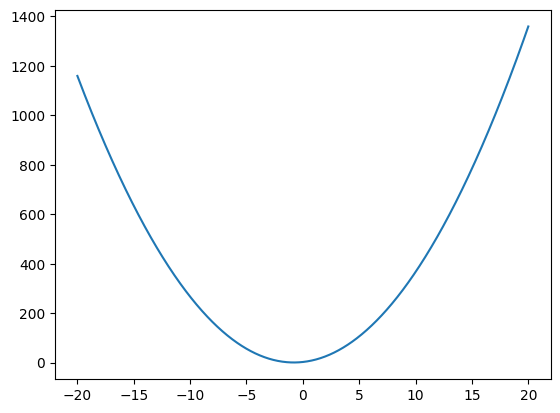

In [116]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-20, 20, 1000)
plt.plot(x, lambdified_expr(x));

## Matrix

In [117]:
mat = sp.Matrix([[2, 1], [3, 4]])
mat

Matrix([
[2, 1],
[3, 4]])

In [118]:
mat.det()

5

In [119]:
mat.row(0)

Matrix([[2, 1]])

In [120]:
#@title Eye matrix
sp.eye(3)

Matrix([
[1, 0, 0],
[0, 1, 0],
[0, 0, 1]])

In [121]:
sp.ones(3, 2)

Matrix([
[1, 1],
[1, 1],
[1, 1]])

In [122]:
sp.zeros(1, 3)

Matrix([[0, 0, 0]])

In [123]:
sp.Matrix([[x0+2, 4], [3, x1]])

Matrix([
[x0 + 2,  4],
[     3, x1]])

In [124]:
sp.MatrixSymbol("A", 2, 3)

A

## Examples

### Ex1

A falling object encounters a moving platform accelerating upwards:

- Object: $h_o(t)=h_0-v_0t-\frac{1}{2}gt^2$,
- Platform: $h_p(t)=v_pt+\frac{1}{2}qt^2$.

**Find the initial velocity $v_o$ such that when the object and platform collide, they are moving at the same speed.**

---

We need to solve for $v_0$ and $t$ in the two equations:

$$\cases{h_o(t)=h_p(t)\\\frac{dh_o}{dt}(t)=-\frac{dh_p}{dt}(t)}\Longrightarrow\cases{h_o(t)-h_p(t)=0\\\frac{dh_o}{dt}(t)+\frac{dh_p}{dt}(t)=0}$$

In [125]:
t, h_0, v_0, g, v_p, q = sp.symbols("t, h_0, v_0, g, v_p, q", real=True, positive=True)

h_o = h_0 - v_0 * t - sp.Rational(1, 2) * g * t ** 2
h_p = v_p * t + sp.Rational(1, 2) * q * t ** 2

[sol[1].simplify() for sol in sp.solve([h_o - h_p, h_o.diff(t) + h_p.diff(t)], [t, v_0])]

[(-v_p*(g + q) + (-g + q)*sqrt(-2*g*h_0 + 6*h_0*q + 4*v_p**2))/(g - 3*q),
 (-v_p*(g + q) + (g - q)*sqrt(-2*g*h_0 + 6*h_0*q + 4*v_p**2))/(g - 3*q)]